## Coding Etiquette & Excel Reporting

#### Content 
1. Region analysis
2. Spending analysis
3. Time and day of sales analysis
4. Age analysis
5. Profiling
6. Price statistics across profiling

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#importing customers data set
df_cust=pd.read_pickle(r'C:\Users\kirat\Documents\Career Foundy\Python\Instacart Basket Analysis\02 Data\Prepared Data\orders_products_customers.pkl')

In [3]:
df_cust.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,First Name,Last Name,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,prior,1,2,8,0.0,196,1,0,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


### 2. Since the dataframe includes first and last name of customers, to avoid the PII issues I will drop those columns from the dataframe

In [4]:
df_cust_noname = df_cust.drop(['First Name','Last Name'], axis=1)

In [5]:
df_cust_noname.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,spending_flag,median_days,frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,prior,1,2,8,0.0,196,1,0,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423


### 3. Adding a column 'region' and comparing the spending per region

In [6]:
Northeast = ['Maine', 'New Hapmshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 
             'Pennsylvania', 'New Jersey']

In [7]:
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 
           'Minnesota', 'Iowa', 'Missouri']

In [8]:
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina',
        'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [9]:
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 
        'Oregon', 'California', 'Hawaii']

In [10]:
region =[]

for value in df_cust_noname['STATE']:
    if (value in West): region.append('West') 
    elif (value in South): region.append('South')
    elif (value in Midwest): region.append('Midwest')
    elif (value in Northeast): region.append('Northeast')
    else: region.append('Other')
        

In [11]:
df_cust_noname['Region'] = region

In [12]:
df_cust_noname.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,median_days,frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region
0,2539329,1,prior,1,2,8,0.0,196,1,0,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,prior,3,3,12,21.0,196,1,1,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,prior,5,4,15,28.0,196,1,1,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [13]:
df_cust_noname['Region'].value_counts(dropna=False)

South        2622243
West         1982424
Midwest      1817547
Northeast    1252968
Other         144278
Name: Region, dtype: int64

In [14]:
df_cust_noname['STATE'].count()

7819460

In [15]:
df_cust_noname.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7819460 entries, 0 to 7819459
Data columns (total 33 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
 7   product_id              int64  
 8   add_to_cart_order       int64  
 9   reordered               int64  
 10  _merge                  object 
 11  product_name            object 
 12  aisle_id                int64  
 13  department_id           int64  
 14  prices                  float64
 15  price_range_loc         object 
 16  busiest_day             object 
 17  busiest_days            object 
 18  busiest_period_of_day   object 
 19  max_order               int64  
 20  loyalty_flag            object 
 21  mean_spend              float64

In [16]:
crosstab = pd.crosstab(df_cust_noname['Region'],df_cust_noname['spending_flag'], dropna=False)

In [17]:
crosstab.to_clipboard()

In [18]:
crosstab

spending_flag,High spender,Low spender
Region,,
Midwest,31054,1786493
Northeast,23536,1229432
Other,2073,142205
South,49730,2572513
West,37345,1945079


The spending habits seem similar in different regions.

### 4. Identifying low activity customers and alocating them to a different datafarame

In [19]:
df_count=df_cust_noname.groupby('user_id').agg({'order_number':['count']})

In [20]:
df_count.info

<bound method DataFrame.info of         order_number
               count
user_id             
1                 59
2                195
3                 88
4                 18
5                 37
...              ...
49665             56
49666             47
49667            113
49668             25
49669              8

[49669 rows x 1 columns]>

In [21]:
df_count.head()

,order_number
,count
user_id,
1,59
2,195
3,88
4,18
5,37


In [22]:
list(df_count.columns)

[('order_number', 'count')]

In [23]:
df_cust_noname = df_cust_noname.join(df_count, on='user_id')

C:\Users\kirat\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [24]:
df_cust_noname.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,"(order_number, count)"
0,2539329,1,prior,1,2,8,0.0,196,1,0,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,59
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,59
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,59
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,59
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,59


In [25]:
df_cust_noname.loc[df_cust_noname[('order_number', 'count')]<5,'Low_activity']='Low'

In [26]:
df_cust_noname.loc[df_cust_noname[('order_number', 'count')]>=5,'Low_activity']='Not Low'

In [27]:
df_cust_noname.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,"(order_number, count)",Low_activity
0,2539329,1,prior,1,2,8,0.0,196,1,0,...,Female,Alabama,31,2/17/2019,3,married,40423,South,59,Not Low
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,59,Not Low
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,59,Not Low
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,59,Not Low
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,59,Not Low


In [28]:
df_low=df_cust_noname.loc[df_cust_noname['Low_activity']=='Low']

In [29]:
df_regular=df_cust_noname.loc[df_cust_noname['Low_activity'] != 'Low']

In [30]:
df_regular.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,"(order_number, count)",Low_activity
0,2539329,1,prior,1,2,8,0.0,196,1,0,...,Female,Alabama,31,2/17/2019,3,married,40423,South,59,Not Low
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,59,Not Low
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,59,Not Low
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,59,Not Low
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,59,Not Low


In [31]:
df_low.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,"(order_number, count)",Low_activity
1056,1384521,6206,prior,3,3,10,29.0,196,1,0,...,Female,Michigan,40,10/28/2018,1,married,30652,Midwest,4,Low
1658,2534676,9346,prior,1,1,12,0.0,196,1,0,...,Female,Idaho,42,1/9/2018,2,married,149794,West,4,Low
1659,1012417,9346,prior,2,1,10,30.0,196,1,1,...,Female,Idaho,42,1/9/2018,2,married,149794,West,4,Low
1660,2485013,9346,prior,3,4,16,30.0,196,1,1,...,Female,Idaho,42,1/9/2018,2,married,149794,West,4,Low
1828,318227,10407,prior,2,5,15,2.0,196,1,0,...,Female,Arizona,68,5/28/2019,0,divorced/widowed,51914,West,3,Low


In [32]:
#dataframe with low activity customers
df_low['Low_activity'].value_counts(dropna=False)

Low    686
Name: Low_activity, dtype: int64

In [33]:
#dataframe with the rest of customers
df_regular['Low_activity'].value_counts(dropna=False)

Not Low    7818774
Name: Low_activity, dtype: int64

In [34]:
df_regular.rename(columns={"order_dow": "order_day_of_week", "order_number": "order_id"}, inplace=True)

C:\Users\kirat\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [35]:
df_regular.info

<bound method DataFrame.info of          order_id  user_id eval_set  order_id  order_day_of_week  \
0         2539329        1    prior         1                  2   
1         2398795        1    prior         2                  3   
2          473747        1    prior         3                  3   
3         2254736        1    prior         4                  4   
4          431534        1    prior         5                  4   
...           ...      ...      ...       ...                ...   
7819455   1675394    49629    prior         4                  5   
7819456   1391969    49634    prior         2                  0   
7819457   1726559    49644    prior         4                  0   
7819458   2756852    49666    prior         5                  5   
7819459    900551    49668    prior         3                  5   

         order_hour_of_day  days_since_prior_order  product_id  \
0                        8                     0.0         196   
1                  

### 5. Profiling

#### Days of the week and hours of the day

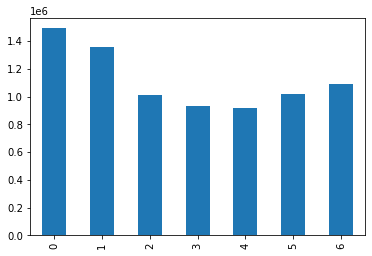

In [36]:
#bar graph for the day of the week
order_dow=df_regular['order_day_of_week'].value_counts().sort_index().plot.bar()

In [37]:
path = r'C:\Users\kirat\Documents\Career Foundy\Python\Instacart Basket Analysis'

In [38]:
order_dow.figure.savefig(os.path.join(path, '04 Analysis', 'Visializations','order_dow.png'))

According to bar graph, Sunday and Monday are the days with highest number of orders

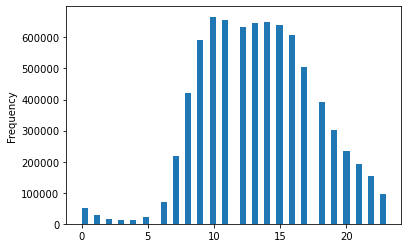

In [39]:
#histogram for the number of orders during a 24 hour period
histH=df_regular['order_hour_of_day'].plot.hist(bins=50)

Histogram shows that the highest number of orders is made 9am-5pm

#### Age profiling

In [40]:
df_regular['Age'].value_counts()

31    134574
24    132213
42    131163
37    131078
52    129858
       ...  
75    112755
41    111640
61    110959
36    110919
68    108718
Name: Age, Length: 64, dtype: int64

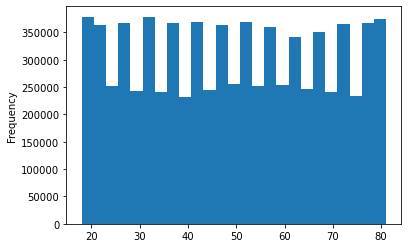

In [41]:
#histogram for Age
hist=df_regular['Age'].plot.hist(bins=25)

Age is uniformly distributed in the customer database

In [42]:
df_regular.Age.describe()

count    7.818774e+06
mean     4.936821e+01
std      1.850271e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [43]:
df_regular.n_dependants.describe()

count    7.818774e+06
mean     1.499693e+00
std      1.115049e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      3.000000e+00
Name: n_dependants, dtype: float64

In [44]:
#quartiles are used to assign age categories
df_regular.loc[df_regular['Age']<33,'age_flag']='18-32'

C:\Users\kirat\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\kirat\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [45]:
df_regular.loc[(df_regular['Age']>=33)&(df_regular['Age']<49),'age_flag']='33-48'

In [46]:
df_regular.loc[(df_regular['Age']>=49)&(df_regular['Age']<65),'age_flag']='49-64'

In [47]:
df_regular.loc[df_regular['Age']>=65,'age_flag']='65+'

In [48]:
df_regular['age_flag'].value_counts()

65+      2061359
49-64    1955692
33-48    1944731
18-32    1856992
Name: age_flag, dtype: int64

In [49]:
crosstab_age=pd.crosstab(df_regular['age_flag'],df_regular['n_dependants'], dropna=False)
crosstab_age

n_dependants,0,1,2,3
age_flag,,,,
18-32,439097,481335,470889,465671
33-48,495944,511128,475449,462210
49-64,491205,481671,490710,492106
65+,511833,506745,517518,525263


#### Departments statistics

In [50]:
df_regular['department_id'].value_counts()

4     2293882
16    1301541
19     696401
7      647271
1      534550
13     452888
3      283014
15     258586
20     255061
9      208877
17     179118
14     169928
12     169914
11     109587
18      99670
6       65203
5       36139
8       23840
21      16327
2        8590
10       8387
Name: department_id, dtype: int64

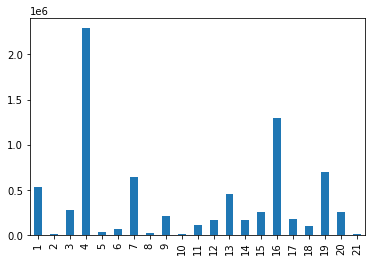

In [51]:
bar=df_regular['department_id'].value_counts().sort_index().plot.bar()

In [52]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visializations', 'bar_dep.png'))

Department with 4 has the highest number of sales

#### Income profiling

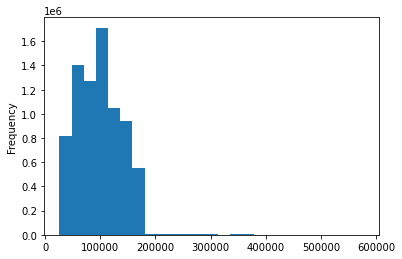

In [53]:
histI=df_regular['income'].plot.hist(bins=25)

In [54]:
df_regular.income.describe()

count    7.818774e+06
mean     9.903080e+04
std      4.327642e+04
min      2.598600e+04
25%      6.644800e+04
50%      9.627000e+04
75%      1.270080e+05
max      5.777280e+05
Name: income, dtype: float64

In [55]:
#income flag is based on standard deviation. The middle is considered to be 1 standard deviation from the mean
df_regular.loc[df_regular['income']<55756,'income_flag']='Lower income'

C:\Users\kirat\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\kirat\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [56]:
df_regular.loc[df_regular['income']>142307, 'income_flag']='Higher income'

In [57]:
df_regular.loc[(df_regular['income']>=55756)&(df_regular['income']<=142307), 'income_flag']='Middle income'

In [58]:
crosstab_income = pd.crosstab(df_regular['Region'],df_regular['income_flag'], dropna=False)
crosstab_income

income_flag,Higher income,Lower income,Middle income
Region,,,
Midwest,304643,284031,1228744
Northeast,210484,185995,856371
Other,25234,21829,97201
South,436688,431158,1754156
West,341321,296912,1344007


In [59]:
crosstab_income.to_clipboard()

In [60]:
df_regular.columns

Index([               'order_id',                 'user_id',
                      'eval_set',                'order_id',
             'order_day_of_week',       'order_hour_of_day',
        'days_since_prior_order',              'product_id',
             'add_to_cart_order',               'reordered',
                        '_merge',            'product_name',
                      'aisle_id',           'department_id',
                        'prices',         'price_range_loc',
                   'busiest_day',            'busiest_days',
         'busiest_period_of_day',               'max_order',
                  'loyalty_flag',              'mean_spend',
                 'spending_flag',             'median_days',
                'frequency_flag',                  'Gender',
                         'STATE',                     'Age',
                   'date_joined',            'n_dependants',
                    'fam_status',                  'income',
                        

#### Profiling according to age, marital status, and number of dependants

In [61]:
df_regular.loc[(df_regular['fam_status']=='married')&(df_regular['n_dependants']==1)&
               (df_regular['age_flag']=='18-32'),'profiling']='Young family with 1 dependants'

C:\Users\kirat\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\kirat\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [62]:
df_regular.loc[(df_regular['fam_status']=='married')&(df_regular['n_dependants']>=2)&
               (df_regular['age_flag']=='18-32'),'profiling']='Young family with 2 or more dependants'

In [63]:
df_regular.loc[(df_regular['fam_status']=='married')&(df_regular['n_dependants']==0)&
               (df_regular['age_flag']=='18-32'),'profiling']='Young family without dependants'

In [64]:
df_regular.loc[(df_regular['fam_status']!='married')&(df_regular['n_dependants']>0)&
               (df_regular['age_flag']=='18-32'),'profiling']='Young single with dependants'

In [65]:
df_regular.loc[(df_regular['fam_status']!='married')&(df_regular['n_dependants']==0)&
               (df_regular['age_flag']=='18-32'),'profiling']='Young single without dependants'

In [66]:
df_regular.loc[(df_regular['fam_status']=='married')&(df_regular['n_dependants']==1)&
               (df_regular['age_flag']=='33-48'),'profiling']='Age 33-48 family with 1 dependant'

In [67]:
df_regular.loc[(df_regular['fam_status']=='married')&(df_regular['n_dependants']>=2)&
               (df_regular['age_flag']=='33-48'),'profiling']='Age 33-48 familty with 2 or more dependants'

In [68]:
df_regular.loc[(df_regular['fam_status']=='married')&(df_regular['n_dependants']==0)&
               (df_regular['age_flag']=='33-48'),'profiling']='Age 33-48 family without dependants'

In [69]:
df_regular.loc[(df_regular['fam_status']!='married')&(df_regular['n_dependants']>0)&
               (df_regular['age_flag']=='33-48'),'profiling']='Age 33-48 single without dependants'

In [70]:
df_regular.loc[(df_regular['fam_status']!='married')&(df_regular['n_dependants']>0)&
               (df_regular['age_flag']=='33-48'),'profiling']='Age 33-48 single with dependants'

In [71]:
df_regular.loc[(df_regular['fam_status']=='married')&(df_regular['n_dependants']==1)&
               (df_regular['age_flag']=='49-64'),'profiling']='Age 49-64 family with 1 dependant'

In [72]:
df_regular.loc[(df_regular['fam_status']=='married')&(df_regular['n_dependants']>=2)&
               (df_regular['age_flag']=='49-64'),'profiling']='Age 49-64 familty with 2 or more dependants'

In [73]:
df_regular.loc[(df_regular['fam_status']=='married')&(df_regular['n_dependants']==0)&
               (df_regular['age_flag']=='49-64'),'profiling']='Age 49-64 family without dependants'

In [74]:
df_regular.loc[(df_regular['fam_status']!='married')&(df_regular['n_dependants']>0)&
               (df_regular['age_flag']=='49-64'),'profiling']='Age 49-64 single without dependants'

In [75]:
df_regular.loc[(df_regular['fam_status']!='married')&(df_regular['n_dependants']>0)&
               (df_regular['age_flag']=='49-64'),'profiling']='Age 49-64 single with dependants'

In [76]:
df_regular.loc[(df_regular['fam_status']=='married')&(df_regular['n_dependants']>0)&
               (df_regular['age_flag']=='65+'),'profiling']='Age 65+ family with dependants'

In [77]:
df_regular.loc[(df_regular['fam_status']=='married')&(df_regular['n_dependants']==0)&
               (df_regular['age_flag']=='65+'),'profiling']='Age 65+ family without dependants'

In [78]:
df_regular.loc[(df_regular['fam_status']!='married')&(df_regular['n_dependants']==0)&
               (df_regular['age_flag']=='65+'),'profiling']='Age 65+ single without dependants'

In [79]:
df_regular.loc[(df_regular['fam_status']!='married')&(df_regular['n_dependants']>0)&
               (df_regular['age_flag']=='65+'),'profiling']='Age 65+ single with dependants'

In [80]:
df_regular.loc[(df_regular['fam_status']=='married')&(df_regular['n_dependants']==0)&
               (df_regular['age_flag']=='33-48'),'profiling']='Age 33-48 family without dependants'

In [81]:
df_regular.loc[(df_regular['fam_status']!='married')&(df_regular['n_dependants']==0)&
               (df_regular['age_flag']=='33-48'),'profiling']='Age 33-48 single without dependants'

In [82]:
df_regular.loc[(df_regular['fam_status']=='married')&(df_regular['n_dependants']==0)&
               (df_regular['age_flag']=='49-64'),'profiling']='Age 49-64 family without dependants'

In [83]:
df_regular.loc[(df_regular['fam_status']!='married')&(df_regular['n_dependants']==0)&
               (df_regular['age_flag']=='49-64'),'profiling']='Age 49-64 single without dependants'

In [84]:
df_regular['profiling'].value_counts()

Age 65+ family with dependants                 1549526
Age 49-64 familty with 2 or more dependants     982816
Age 33-48 familty with 2 or more dependants     937659
Young family with 2 or more dependants          681605
Age 65+ single without dependants               511833
Age 33-48 family with 1 dependants              511128
Age 33-48 single without dependants             495944
Age 49-64 single without dependants             491205
Age 49-64 family with 1 dependants              481671
Young single without dependants                 439097
Young single with dependants                    388451
Young family with 1 dependants                  347839
Name: profiling, dtype: int64

In [85]:
df_regular.shape

(7818774, 38)

In [86]:
df_regular['profiling'].isnull().sum()

0

In [87]:
crosstab_prof = pd.crosstab(df_regular['profiling'],df_regular['Region'], dropna=False)
crosstab_prof

Region,Midwest,Northeast,Other,South,West
profiling,,,,,
Age 33-48 familty with 2 or more dependants,213386,146412,20682,317211,239968
Age 33-48 family with 1 dependants,129510,84627,7683,159659,129649
Age 33-48 single without dependants,123480,74008,8365,171104,118987
Age 49-64 familty with 2 or more dependants,219826,163451,18187,327388,253964
Age 49-64 family with 1 dependants,106021,76184,10173,161784,127509
Age 49-64 single without dependants,121265,71970,6828,162603,128539
Age 65+ family with dependants,356998,246170,29713,517392,399253
Age 65+ single without dependants,113298,98406,9552,164539,126038
Young family with 1 dependants,80279,61408,5453,113454,87245


In [88]:
df=df_regular.drop(['eval_set'], axis=1)

In [89]:
df.shape

(7818774, 37)

In [90]:
crosstab_prof.to_clipboard()

In [91]:
df.columns

Index([               'order_id',                 'user_id',
                      'order_id',       'order_day_of_week',
             'order_hour_of_day',  'days_since_prior_order',
                    'product_id',       'add_to_cart_order',
                     'reordered',                  '_merge',
                  'product_name',                'aisle_id',
                 'department_id',                  'prices',
               'price_range_loc',             'busiest_day',
                  'busiest_days',   'busiest_period_of_day',
                     'max_order',            'loyalty_flag',
                    'mean_spend',           'spending_flag',
                   'median_days',          'frequency_flag',
                        'Gender',                   'STATE',
                           'Age',             'date_joined',
                  'n_dependants',              'fam_status',
                        'income',                  'Region',
       ('order_number', 

In [92]:
df['loyalty_flag'].value_counts()

Regular customer    3826135
Loyal customer      2501034
New customer        1491605
Name: loyalty_flag, dtype: int64

In [93]:
df['spending_flag'].value_counts()

Low spender     7675180
High spender     143594
Name: spending_flag, dtype: int64

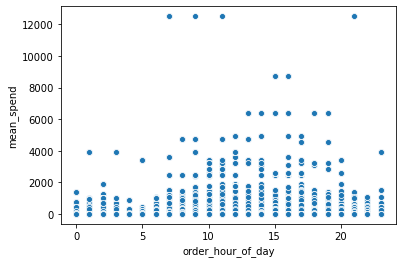

In [94]:
plot_hours = sns.scatterplot(x='order_hour_of_day', y='mean_spend', data=df)

In [95]:
plot_hours.figure.savefig(os.path.join(path, '04 Analysis', 'Visializations','plot_hours.png'))

In [96]:
df['price_range_loc'].value_counts()

Mid range product     5276352
Low range product     2442884
High range product      99538
Name: price_range_loc, dtype: int64

#### Region and price range analysis

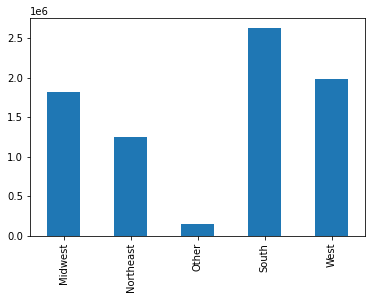

In [97]:
bar_region=df_regular['Region'].value_counts().sort_index().plot.bar()

In [106]:
bar_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visializations','bar_region.png'))

In [101]:
crosstab_price = pd.crosstab(df_regular['Region'],df_regular['price_range_loc'], dropna=False)
crosstab_price

price_range_loc,High range product,Low range product,Mid range product
Region,,,
Midwest,22956,567978,1226484
Northeast,16182,393174,843494
Other,1822,45000,97442
South,33073,818955,1769974
West,25505,617777,1338958


In [102]:
crosstab_price.to_clipboard()

In [104]:
crosstab_family = pd.crosstab(df_regular['profiling'],df_regular['price_range_loc'], dropna=False)
crosstab_family

price_range_loc,High range product,Low range product,Mid range product
profiling,,,
Age 33-48 familty with 2 or more dependants,11971,292830,632858
Age 33-48 family with 1 dependants,6842,159459,344827
Age 33-48 single without dependants,6026,155621,334297
Age 49-64 familty with 2 or more dependants,13021,308482,661313
Age 49-64 family with 1 dependants,5787,152706,323178
Age 49-64 single without dependants,5979,152379,332847
Age 65+ family with dependants,20354,482525,1046647
Age 65+ single without dependants,6755,159290,345788
Young family with 1 dependants,4299,107804,235736


In [105]:
crosstab_family.to_clipboard()

### 7. Mean, minimum, maximum of prices within profiling

In [107]:
df.groupby('profiling').prices.mean()

profiling
Age 33-48 familty with 2 or more dependants    11.520890
Age 33-48 family with 1 dependants             10.503776
Age 33-48 single without dependants             9.224767
Age 49-64 familty with 2 or more dependants    11.867863
Age 49-64 family with 1 dependants             11.256964
Age 49-64 single without dependants            10.592501
Age 65+ family with dependants                 11.232289
Age 65+ single without dependants              12.352731
Young family with 1 dependants                 11.773420
Young family with 2 or more dependants         11.208246
Young single with dependants                    9.962890
Young single without dependants                 9.252573
Name: prices, dtype: float64

In [108]:
df.groupby('profiling').prices.min()

profiling
Age 33-48 familty with 2 or more dependants    1.0
Age 33-48 family with 1 dependants             1.0
Age 33-48 single without dependants            1.0
Age 49-64 familty with 2 or more dependants    1.0
Age 49-64 family with 1 dependants             1.0
Age 49-64 single without dependants            1.0
Age 65+ family with dependants                 1.0
Age 65+ single without dependants              1.0
Young family with 1 dependants                 1.0
Young family with 2 or more dependants         1.0
Young single with dependants                   1.0
Young single without dependants                1.0
Name: prices, dtype: float64

In [109]:
df.groupby('profiling').prices.max()

profiling
Age 33-48 familty with 2 or more dependants    99999.0
Age 33-48 family with 1 dependants             99999.0
Age 33-48 single without dependants            14900.0
Age 49-64 familty with 2 or more dependants    99999.0
Age 49-64 family with 1 dependants             99999.0
Age 49-64 single without dependants            99999.0
Age 65+ family with dependants                 99999.0
Age 65+ single without dependants              99999.0
Young family with 1 dependants                 99999.0
Young family with 2 or more dependants         99999.0
Young single with dependants                   99999.0
Young single without dependants                14900.0
Name: prices, dtype: float64

### 8. Region vs deparment analysis

In [110]:
crosstab_dep = pd.crosstab(df_regular['Region'],df_regular['department_id'], dropna=False)
crosstab_dep

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
Region,,,,,,,,,,,,,,,,,,,,,
Midwest,124110,1926,65847,534651,8463,15476,149725,5775,48863,2042,...,39128,105563,39736,59564,299544,43973,22608,162377,58307,3825
Northeast,83936,1524,45762,364779,5427,10016,104443,4206,33981,1156,...,27919,71496,27207,41179,209287,28330,18228,112725,41439,2624
Other,9946,145,5535,40893,548,1112,13141,377,3574,158,...,3092,8232,3222,5013,23874,3357,1502,13294,4827,306
South,180492,2877,94214,771573,11885,21937,220058,7142,68232,2680,...,55961,151774,56479,86034,440200,58583,33383,230446,85858,5559
West,136066,2118,71656,581986,9816,16662,159904,6340,54227,2351,...,43814,115823,43284,66796,328636,44875,23949,177559,64630,4013


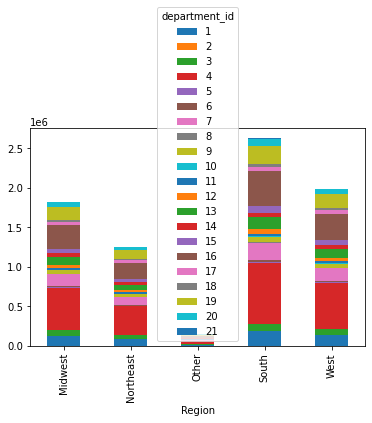

In [118]:
crosstab_dep.plot.bar(stacked=True)

In [99]:
# exporting dataframe to a pickle file
df.to_pickle(r'C:\Users\kirat\Documents\Career Foundy\Python\Instacart Basket Analysis\02 Data\Prepared Data\data_final.pkl')